In [9]:
using Distributions, HaltonSequences, WebIO, Interact, Plots, FastGaussQuadrature, QuadGK, Random

# Homework: Integration using Three Methods

[//]: # "未來：對一個 multi dimensional integration, 用 Gaussian quadrature 來做，然後與 QMC 比較。"



##  Let's redo the integration problem using QMC:

  \begin{aligned}
   I = \int_{-\infty}^\infty \exp\left(-\frac{1}{3}x^2\right)\sqrt{1+x^2} dx.
  \end{aligned}
  
  - Use quasi Monte Carlo method to compute the integration.
  - transform the infinite domain to $[0,1]$; mind the Jacobian;
  - draw Halton sequence from $[0,1]$;
  - compute the integration with a given $n$.
- Inspect the convergence path by computing $I$ using different values $n$, and show using an interactive plot (using `@manipulate`) with $n$ and $I$ on the horizontal and vertical axes, respectively.

# Answer
  \begin{aligned}
   I &= \int_{-\infty}^\infty \exp\left(-\frac{1}{3}x^2\right)\sqrt{1+x^2} dx. &&Let \quad x=\frac{2t - 1}{t - t^2}\text{,  jacobian} = \frac{2t^2-2t+1}{(t^2-t)^2} \\
     &= \int_{0}^1 \exp\left(-\frac{1}{3}\left(\frac{2t - 1}{t - t^2}\right)^2\right)\sqrt{1+\left(\frac{2t - 1}{t - t^2}\right)^2} \frac{2t^2-2t+1}{(t^2-t)^2}dt 
  \end{aligned}

In [2]:
j1(t) = (2 .* t .^ 2 .- 2 .* t .+ 1) ./ (t .^ 2 .- t) .^ 2
x1(t) = (2 .* t .- 1) ./ (t .- t .^ 2)
f1(t) = exp.( -(1/3) .* x1(t) .^ 2) .* sqrt.(1 .+ x1(t) .^2) .* j1(t)

function draw_Halton_and_compute(prime, n)
    I = zeros(n) #save the integral in list I
    for i in 1:n
        
        #draw Halton sequence
        t = Halton(prime, length=i)
        
        #compute the integration
        integral = mean(f1.(t))
        I[i] = integral
    end
    return I
end

quadgk_value =  quadgk(f1, 0, 1)

@show quadgk_value[1]
@manipulate for prime = (2,3,5,7,11,13,47), n = 1:10:1000
    y = draw_Halton_and_compute(prime, n)
    x = 1:n
    plot(x, y, title = "Integral", xlabel = "n size", ylabel = "integral", label = "I")
    hline!([quadgk_value[1]])
end

quadgk_value[1] = 4.5638130028798365


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["prime"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol, Any}(:attributes => ("data-bind" => "foreach : options_js"), :className => "buttons has-addons is-centered"))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}())], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable(OrderedDict[OrderedDict{String, Any}("key" => "2", "val" => 1, "id" => "idR35nZza3"), OrderedDict{String, Any}("key" => "3", "val" => 2, "id" => "idMqJmMg3X"), OrderedDict{String, Any}("key" => "5", "val" => 3, "id" => "idIyVRCIYF"), OrderedDict{String, Any}("key" => "7", "val" => 4, "id" => "idvpCSbZRc"), OrderedDict{String, Any}("key" => "11", "val" => 5, "id" => "idi3Qvysqm"), OrderedDict{String, Any}("key" => "13", "val" => 6, "id" => "idtWz7fvTg"), OrderedDict{String, Any}("key" => "47", "val" => 7, "id" => "idyAmPvwST")]), nothing), "index" => (Observable{Any}(1), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\user\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\user\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\user\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\user\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\user\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable, started) @0x00000188f366e4e0, Task (runnable, started) @0x00000188f366e4e0), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (824633721024, 224, 143866110317)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(

## 
Consider the following integration problem:
\begin{align}
  I = \int_a^1 c\cdot x^{-k-1}(1-x)^{k+1}dx.
\end{align}
Assume $a = 10^{-5}$, $c=10^{-9}$, and $k=2$.

### Plot (multiple) graphs of the integrand to have a basic understanding of the problem. As you can see from the equation, the integrand may be tricky when $x$ approaches 0 and when $x$ approaches 1. Therefore, plot the graphs that highlight the integrand's shape near x=0 and x=1.

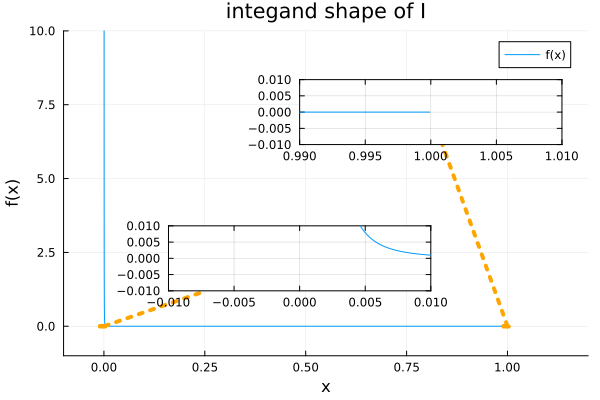

In [3]:
a = 10^(-5)
c = 10^(-9)
k = 2
f(x) = c*x^(-k-1)*(1-x)^(k+1)
x = a:0.0001:1
plot(x, f.(x), ylim = (-1, 10), xlim = (-0.1, 1.2), label = "f(x)", ylabel = "f(x)", xlabel = "x", title = "integrand shape of I")
lens!([-0.01, 0.01], [-0.01, 0.01],  inset = (1, bbox(0.2, 0.2, 0.5, 0.2, :bottom, :left)),
    subplot=2, framestyle=:box, lw=4, ls=:dot, lc=:orange)
lens!([0.99, 1.01], [-0.01, 0.01],  inset = (1, bbox(0.05, 0.15, 0.5, 0.2, :top, :right)),
    subplot=2, framestyle=:box, lw=4, ls=:dot, lc=:orange)


### Use the Gauss-Legendre rule to compute the integral. How many nodes are required to have a stable solution (say, five digits after the decimal point are unchanged) ? 
- Hint: A lot of nodes.

\begin{align}
  I &= \int_a^1 c\cdot x^{-k-1}(1-x)^{k+1}dx. &&let \quad x = \frac{a+1}{2} + \frac{1-a}{2}t,\quad jacobian = \frac{1-a}{2}\quad (b=1)\\
    &= \int_{-1}^1 c\cdot \left(\frac{a+1}{2} + \frac{1-a}{2}t\right)^{-k-1}\left(1-\left(\frac{a+1}{2} + \frac{1-a}{2}t\right)\right)^{k+1}\frac{1-a}{2}dt
\end{align}

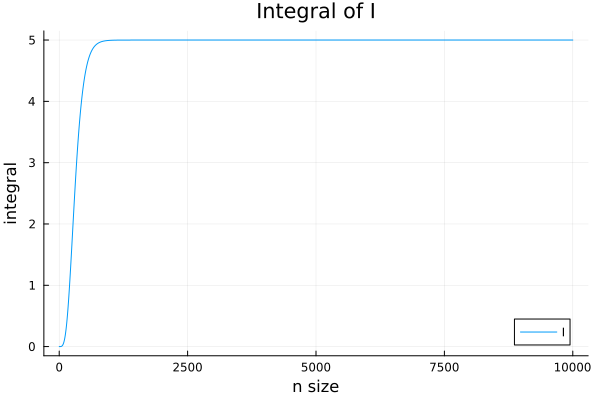

converge_pt = 1153
I_legendre[n] = 4.9997


4.9997

In [4]:

n=10000
I_legendre = zeros(n)
converge_pt = nothing

for i in 1:n
    t, w = gausslegendre(i)
    x = (a+1)/2 .+ (1-a)/2 .* t
    jacobian = (1-a)/2
    ft = c .* x .^ (-k-1) .* (1 .- x) .^ (k+1) .* jacobian
    GL_integral = sum(w .* ft)
    
    #用floor取到小數點後6位，並存到I_legendre
    I_legendre[i] = floor(GL_integral * 10^5)/ 10^5
end
plot(1:n, I_legendre, label = "I", xlabel = "n size", ylabel = "integral", title = "Integral of I") |> display

#若第n個積分值與第n-1個積分值相同，表示在第n-1個積分值開始收斂
#在 converge_pt 儲存開始收斂的點
for i in 1:n
    if i > 1 && isnothing(converge_pt) && I_legendre[i]>4 #由圖知 I > 4
        if I_legendre[i] == I_legendre[i-1] 
            converge_pt = i
        end
    end
end
@show converge_pt
@show I_legendre[n]

### Use both of the Monte Carlo method (with pseudo random numbers) and Quasi-Monte Carlo method (with the Halton sequence) to compute the integral. How long does the sequences need to be in order to have a stable solution (2 digits after the decimal point)? Which method, MC or QMC, uses smaller values of $n$?
- Hint: A very long sequence.
- Hint: The following generates a Halton sequence of length 100 with the base number=2: `using HaltonSequences;` `lds=Halton(2,100)`.

\begin{align}
  I &= \int_a^1 c\cdot x^{-k-1}(1-x)^{k+1}dx. &&let \quad x = a + (1-a)t,\quad jacobian = 1 - a  \quad (b=1)\\
    &= \int_0^1 c\cdot \left(a + \left(1-a\right)t\right)^{-k-1}\left(1-\left(a + \left(1-a\right)t\right)\right)^{k+1}(1-a)dt
\end{align}

In [ ]:
a = 10^(-5)
c = 10^(-9)
k = 2

x2(t) = a .+ (1-a) .* t
jacobian = 1-a
f2(t) = c .* x2(t) .^ (-k-1) .* (1 .- x2(t)) .^ (k+1) .* jacobian

function MC_and_QMC(n)

    # draw t from Uniform(0,1) for MC
    t_MC = rand(n)
    
    # draw t from Halton sequence for QMC
    t_QMC = Halton(2, length = n)
    
    # compute the integration
    # MC integral
    MC_integral = mean(f2.(t_MC))
    # QMC integral
    QMC_integral = mean(f2.(t_QMC))
    
    return MC_integral, QMC_integral
end
Random.seed!(456)
MC_and_QMC(500000000)
#=
MC = zeros(3)
QMC = zeros(3)
n_size = [200, 200_000, 200_000_000]
for i in 1:length(n_size)
    MC[i], QMC[i] = MC_and_QMC(n_size[i])
end
@show MC, QMC=#
# QMC needs less samples to have a stable solution.

### Julia provides a package `QuadGK.jl` which has a function `quadgk()` that uses *adaptive quadratures* to do one-dimensional numerical integration. Use `using Pkg; Pkg.add("QuadGK.jl")` to install it, and `using QuadGK` to call it.
- Review previous lecture notes to understand what is adaptive quadratures.
- Use `quadgk()` function to compute the integration.

In [6]:
integral, error = quadgk(f2, 0, 1)

(4.999700036038788, 8.454822187001694e-10)

### You tried several methods to calculate the integration: The Gauss-Legendre method, the quasi-Monte Carlo method using the Halton sequence, the Monte Carlo method using random draws, and the adaptive quadrature method. How would you rank the methods from the most efficient (in terms of using a smaller number of draws/points, which usually translates to shorter run time) to the least efficient? Please explain the possible reasons behind the most and the least efficient methods.

The efficient rank
Gauss-Legendre > quasi-Monte Carlo > Monte Carlo > adaptive quadrature

Gauss-Legendre method: It is able to effectively allocate weights to regions within the integration interval, requiring fewer sample points than other methods.

Adaptive quadrature method: It requires multiple interval divisions and refinements, and performs integration on each subinterval, which leads to higher computational overhead.